In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import keras

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(os.path.join(cur_path,'Traffic','train'))

/kaggle/working/Traffic/train


In [3]:
temp=0
for i in range(classes):
    path = os.path.join('../input/traffic-sign/traffic/Train',str(i))
    
    images = os.listdir(path)
    
    for a in images:
        
        try:
            image = Image.open(path + '/'+ a)
            
            temp+=1
            
            image = image.resize((30,30))
            
            image = np.array(image)
            data.append(image)
            labels.append(i)
           
        except:
            print("Error loading image")
print(temp)

39209


In [4]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          5

In [9]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 40
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/40
491/491 [==============================] - 11s 7ms/step - loss: 6.0306 - accuracy: 0.0539 - val_loss: 2.8479 - val_accuracy: 0.2618
Epoch 2/40
491/491 [==============================] - 3s 6ms/step - loss: 2.6893 - accuracy: 0.2578 - val_loss: 1.7720 - val_accuracy: 0.4412
Epoch 3/40
491/491 [==============================] - 3s 6ms/step - loss: 1.9784 - accuracy: 0.3909 - val_loss: 1.4640 - val_accuracy: 0.5108
Epoch 4/40
491/491 [==============================] - 3s 6ms/step - loss: 1.6749 - accuracy: 0.4546 - val_loss: 1.1573 - val_accuracy: 0.6086
Epoch 5/40
491/491 [==============================] - 3s 6ms/step - loss: 1.4278 - accuracy: 0.5358 - val_loss: 0.8572 - val_accuracy: 0.7326
Epoch 6/40
491/491 [==============================] - 3s 6ms/step - loss: 1.1934 - accuracy: 0.6131 - val_loss: 0.6441 - val_accuracy: 0.8004
Epoch 7/40
491/491 [==============================] - 3s 6ms/step - loss: 1.0016 - accuracy: 0.6810 - val_loss: 0.4938 - val_accuracy: 0.8525
Epoch

In [10]:
from tabulate import tabulate

table=[['Epoch','Accuracy','Loss','Val Accuracy','Val Loss']]
for i in range(epochs-1):
    temp=[str(i)]
    temp.append(str(float("{0:.4f}".format(history.history['accuracy'][i]))*100))
    temp.append(str(float("{0:.4f}".format(history.history['loss'][i]))))
    temp.append(str(float("{0:.4f}".format(history.history['val_accuracy'][i]))*100))
    temp.append(str(float("{0:.4f}".format(history.history['val_loss'][i]))))
    table.append(temp)
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤════════════╤════════╤════════════════╤════════════╕
│   Epoch │   Accuracy │   Loss │   Val Accuracy │   Val Loss │
╞═════════╪════════════╪════════╪════════════════╪════════════╡
│       0 │       8.73 │ 3.8547 │          26.18 │     2.8479 │
├─────────┼────────────┼────────┼────────────────┼────────────┤
│       1 │      29.86 │ 2.4589 │          44.12 │     1.772  │
├─────────┼────────────┼────────┼────────────────┼────────────┤
│       2 │      40.13 │ 1.9063 │          51.08 │     1.464  │
├─────────┼────────────┼────────┼────────────────┼────────────┤
│       3 │      47.17 │ 1.6098 │          60.86 │     1.1573 │
├─────────┼────────────┼────────┼────────────────┼────────────┤
│       4 │      54.73 │ 1.3867 │          73.26 │     0.8572 │
├─────────┼────────────┼────────┼────────────────┼────────────┤
│       5 │      62.81 │ 1.1593 │          80.04 │     0.6441 │
├─────────┼────────────┼────────┼────────────────┼────────────┤
│       6 │      69.58 │ 0.9651 │       

In [11]:
table2=[['Max Accuracy','Min Loss','Max Val Accuracy','Min Val loss']]

temp=[str(max(history.history['accuracy'])*100),str(min(history.history['loss'])),str(max(history.history['val_accuracy'])*100),str(min(history.history['accuracy']))]
table2.append(temp)

print(tabulate(table2, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤════════════╤════════════════════╤════════════════╕
│   Max Accuracy │   Min Loss │   Max Val Accuracy │   Min Val loss │
╞════════════════╪════════════╪════════════════════╪════════════════╡
│        88.5804 │   0.452376 │            97.7684 │      0.0872892 │
╘════════════════╧════════════╧════════════════════╧════════════════╛


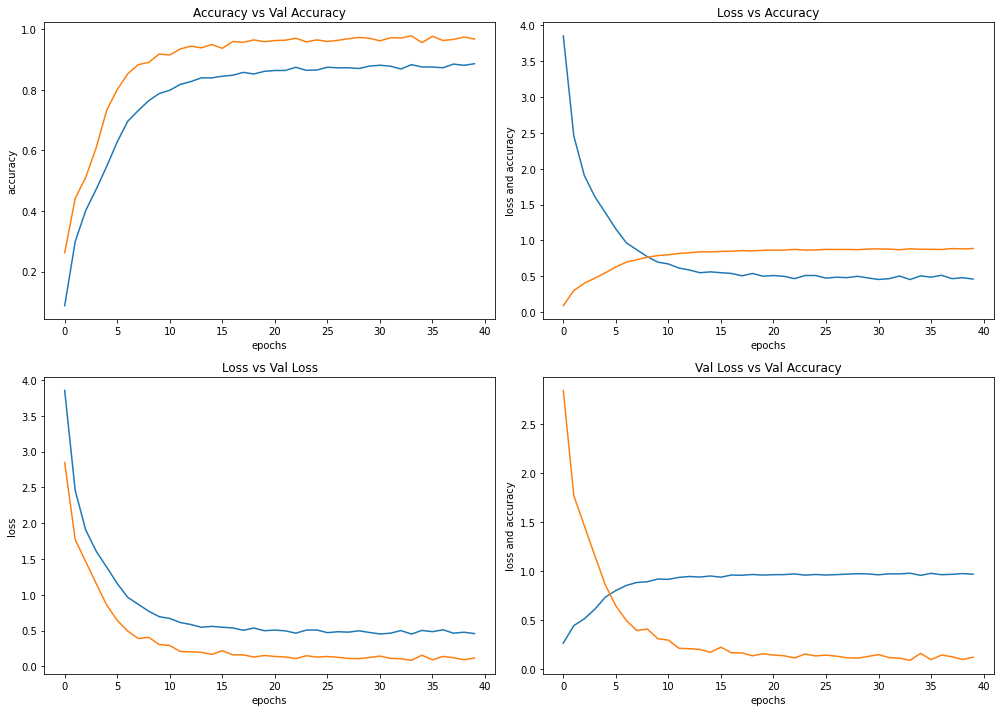

In [12]:
#plotting graphs for accuracy 
fig, axs = plt.subplots(2, 2,figsize=(14,10))
axs[0, 0].plot(history.history['accuracy'], label='training accuracy')
axs[0, 0].plot(history.history['val_accuracy'], label='val accuracy')
axs[0, 0].set_title('Accuracy vs Val Accuracy')
axs[0, 0].set_xlabel('epochs')
axs[0, 0].set_ylabel('accuracy')



axs[1, 0].plot(history.history['loss'], label='training loss')
axs[1, 0].plot(history.history['val_loss'], label='val loss')
axs[1, 0].set_title('Loss vs Val Loss')
axs[1, 0].set_xlabel('epochs')
axs[1, 0].set_ylabel('loss')

axs[0, 1].plot(history.history['loss'], label='training loss')
axs[0, 1].plot(history.history['accuracy'], label='trainning accuracy')
axs[0, 1].set_title('Loss vs Accuracy')
axs[0, 1].set_xlabel('epochs')
axs[0, 1].set_ylabel('loss and accuracy')



axs[1, 1].plot(history.history['val_accuracy'], label='val accuracy')
axs[1, 1].plot(history.history['val_loss'], label='val loss')
axs[1, 1].set_title('Val Loss vs Val Accuracy')
axs[1, 1].set_xlabel('epochs')
axs[1, 1].set_ylabel('loss and accuracy')

fig.tight_layout()